# Data  Exploration and Cleaning

The code starts with the cell which imports the required libraries and also used Python function. This function utilizes a library called Pandas to fetch information from three CSV files stored on GitHub and organize it into Pandas DataFrames. Additionally, we apply a setting called `low_memory=False` to the function to prevent any alerts or notifications regarding the presence of mixed data types within the columns. This setting is especially useful when handling extensive datasets.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import UndefinedMetricWarning 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier


#data on github url
url_accident = "https://raw.githubusercontent.com/Sayalinale/RoadTraffic-Analysis/main/dft-road-casualty-statistics-accident-2021.csv"
url_casualty = "https://raw.githubusercontent.com/Sayalinale/RoadTraffic-Analysis/main/dft-road-casualty-statistics-casualty-2021.csv"
url_vehicle = "https://raw.githubusercontent.com/Sayalinale/RoadTraffic-Analysis/main/dft-road-casualty-statistics-vehicle-2021.csv"

# Load CSV files into Pandas  DataFrames with low_memory=False
df_accident_data = pd.read_csv(url_accident, low_memory=False)
df_casualty_data = pd.read_csv(url_casualty, low_memory=False)
df_vehicle_data = pd.read_csv(url_vehicle, low_memory=False)

To know more about the size of the dataset checked the shape three csv files 

In [2]:
df_accident_data.shape

(101087, 36)

In [3]:
df_casualty_data.shape

(128209, 19)

In [4]:
df_vehicle_data.shape

(186443, 29)

As we got the output from the above cell we got the how many records and attributes are there in three different files now merging of three files would be helpful to work with the dataset. We are going to merge three files using the common column in three files which is 'accident_reference'. 

In [5]:
# Merge the DataFrames on the 'accident_reference' column
merged_data = pd.merge(df_accident_data, df_casualty_data, on='accident_reference')
merged_data = pd.merge(merged_data, df_vehicle_data, on='accident_reference')

# Now, 'merged_data' contains the merged data from all three DataFrames based on 'accident_reference'

To know about the merged files. I have printed out the shape and column name.

In [6]:
print(merged_data.columns)
print(merged_data.shape)

Index(['accident_index_x', 'accident_year_x', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'trunk_road_flag.1', 'accident_index_y',
       'accident_year_y', 'vehicle_reference_x', 'casualty_reference',
       'ca

When we merged the three csv files, there are few coulmns which are similar,to confirm it we have checked values from each column. In the below given code's output it shows that accident_index and accident_year has multiple columns of same value.

In [7]:
# Check if the columns have the same values
# 1. Check columns: accident_index_x, accident_index, accident_index_y
same_accident_index = merged_data['accident_index_x'] == merged_data['accident_index_y']
same_accident_index = same_accident_index & (merged_data['accident_index_x'] == merged_data['accident_index'])

# 2. Check columns: accident_year_x, accident_year_y, accident_year
same_accident_year = merged_data['accident_year_x'] == merged_data['accident_year_y']
same_accident_year = same_accident_year & (merged_data['accident_year_x'] == merged_data['accident_year'])

# Print the results
print("1. Columns accident_index_x, accident_index, accident_index_y:")
print("All values are the same:", same_accident_index.all())

print("\n2. Columns accident_year_x, accident_year_y, accident_year:")
print("All values are the same:", same_accident_year.all())



1. Columns accident_index_x, accident_index, accident_index_y:
All values are the same: True

2. Columns accident_year_x, accident_year_y, accident_year:
All values are the same: True


In this step we will check null values for the merged file.

In [8]:
# Check for null values in the merged DataFrame
null_values = merged_data.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()

# Print the null counts for all columns
for column, count in null_counts.items():
    print(f"Column '{column}': {count} missing values")


Column 'accident_index_x': 0 missing values
Column 'accident_year_x': 0 missing values
Column 'accident_reference': 0 missing values
Column 'location_easting_osgr': 43 missing values
Column 'location_northing_osgr': 43 missing values
Column 'longitude': 43 missing values
Column 'latitude': 43 missing values
Column 'police_force': 0 missing values
Column 'accident_severity': 0 missing values
Column 'number_of_vehicles': 0 missing values
Column 'number_of_casualties': 0 missing values
Column 'date': 0 missing values
Column 'day_of_week': 0 missing values
Column 'time': 0 missing values
Column 'local_authority_district': 0 missing values
Column 'local_authority_ons_district': 0 missing values
Column 'local_authority_highway': 0 missing values
Column 'first_road_class': 0 missing values
Column 'first_road_number': 0 missing values
Column 'road_type': 0 missing values
Column 'speed_limit': 0 missing values
Column 'junction_detail': 0 missing values
Column 'junction_control': 0 missing value

Now the below cell will remove the rows which has the null values and the extra columns from the dataset.

In [9]:
# List of columns to keep
columns_to_keep = [
    'accident_year',
    'accident_reference',
    'location_easting_osgr',
    'location_northing_osgr',
    'longitude',
    'latitude',
    'police_force',
    'accident_severity',
    'number_of_vehicles',
    'number_of_casualties',
    'date',
    'day_of_week',
    'time',
    'local_authority_district',
    'first_road_class',
    'first_road_number',
    'road_type',
    'speed_limit',
    'junction_detail',
    'junction_control',
    'second_road_class',
    'second_road_number',
    'pedestrian_crossing_human_control',
    'pedestrian_crossing_physical_facilities',
    'light_conditions',
    'weather_conditions',
    'road_surface_conditions',
    'special_conditions_at_site',
    'carriageway_hazards',
    'urban_or_rural_area',
    'did_police_officer_attend_scene_of_accident',
    'trunk_road_flag',
    'trunk_road_flag.1',
    'vehicle_reference_x',
    'casualty_reference',
    'casualty_class',
    'sex_of_casualty',
    'age_of_casualty',
    'age_band_of_casualty',
    'casualty_severity',
    'pedestrian_location',
    'pedestrian_movement',
    'car_passenger',
    'bus_or_coach_passenger',
    'pedestrian_road_maintenance_worker',
    'casualty_type',
    'casualty_home_area_type',
    'casualty_imd_decile',
    'vehicle_type',
    'towing_and_articulation',
    'vehicle_manoeuvre',
    'vehicle_direction_from',
    'vehicle_direction_to',
    'vehicle_location_restricted_lane',
    'vehicle_location_restricted_lane.1',
    'skidding_and_overturning',
    'hit_object_in_carriageway',
    'vehicle_leaving_carriageway',
    'hit_object_off_carriageway',
    'first_point_of_impact',
    'vehicle_left_hand_drive',
    'journey_purpose_of_driver',
    'sex_of_driver',
    'age_of_driver',
    'age_band_of_driver',
    'engine_capacity_cc',
    'propulsion_code',
    'age_of_vehicle',
    'driver_imd_decile',
    'driver_home_area_type',
    'lsoa_of_driver'
]

# Keep only the specified columns
merged_data = merged_data[columns_to_keep]

# Remove rows with null values
merged_data = merged_data.dropna()

To make sure we have removed the null values and the extra columns the following two cell will print the shape and columns name.

In [10]:
merged_data.shape

(246271, 71)

In [11]:
print(merged_data.columns)

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'trunk_road_flag.1', 'vehicle_reference_x',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'pedestrian_location', 'pedes

# Statistical information regarding traffic accident characteristics

Now data is processed and ready to do analysis. The next we will performing the descriptive statestical summary of our dataset.In which we will get count of the traffic accident according to the casuality servity (fatal,serious,slight) with the considerdation of various variables such as day of week, light consition wheather condition etc.

In [12]:
# Load CSV files into Pandas DataFrames with low_memory=False
labels_accident = "https://raw.githubusercontent.com/Sayalinale/RoadTraffic-Analysis/main/Road-Safety-Open-Dataset-Data-Guide.csv"
df_accident_data_labels = pd.read_csv(labels_accident, low_memory=False)

# Define a function to map codes to labels for a specific field
def map_codes_to_labels(field_name):
    field_labels = df_accident_data_labels[df_accident_data_labels['field name'] == field_name]
    code_to_label = dict(zip(field_labels['code/format'], field_labels['label']))
    return code_to_label

# Define a function to count occurrences for a specific field by casualty_severity
def count_field_by_severity(data, field_name):
    counts = {}
    for severity in [1, 2, 3]:
        subset = data[data['accident_severity'] == severity]
        field_counts = subset[field_name].value_counts()
        counts[severity] = field_counts
    return counts

# List of variables which should analyze
variables_to_analyze = [
    'day_of_week',
    'road_type',
    'light_conditions',
    'weather_conditions',
    'road_surface_conditions',
    'sex_of_driver',
    'casualty_class',
    'junction_detail',
    'junction_control',
    'vehicle_type',
    'vehicle_manoeuvre',
    'road_surface_conditions',
    'casualty_severity'
]

# Iterate over each variable and create tables
for variable in variables_to_analyze:
    # Count occurrences for the current variable by casualty_severity
    variable_counts_by_severity = count_field_by_severity(merged_data, variable)

    # Get the code to label mapping for the current variable
    variable_labels = map_codes_to_labels(variable)

    # Get the label for 'accident_severity' field
    accident_severity_label = map_codes_to_labels('accident_severity')

    # Display the counts with labels
    print(f"Analysis for {variable}:")
    for severity, counts in variable_counts_by_severity.items():
        severity_label = accident_severity_label.get(str(severity), 'Unknown')
        print(f" {severity_label}:")
        for code, count in counts.items():
            label = variable_labels.get(str(code), 'Unknown')
            print(f"  {label}: {count}")
    print("\n") 
    
    
    # Define a function to calculate the total number of accidents by variable and labels
def calculate_total_accidents_by_variable(data, variable, variable_labels):
    variable_counts = data[variable].value_counts()
    total_accidents = variable_counts.sum()
    
#     print(f"Total accidents for {variable}: {total_accidents}\n")
    
    for code, count in variable_counts.items():
        label = variable_labels.get(str(code), 'Unknown')
        percentage = (count / total_accidents) * 100
        print(f"{label}: {count} ({percentage:.2f}%)")

# Iterate over each variable and create tables
for variable in variables_to_analyze:
    # Count occurrences for the current variable by casualty_severity
    variable_counts_by_severity = count_field_by_severity(merged_data, variable)

    # Get the code to label mapping for the current variable
    variable_labels = map_codes_to_labels(variable)

    # Get the label for 'accident_severity' field
    accident_severity_label = map_codes_to_labels('accident_severity')

    print(f"The total percenatge analysis for {variable}:\n")
    calculate_total_accidents_by_variable(merged_data, variable, variable_labels)
    print("\n")


Analysis for day_of_week:
 Fatal:
  Thursday: 714
  Friday: 706
  Sunday: 690
  Saturday: 684
  Wednesday: 682
  Monday: 597
  Tuesday: 594
 Serious:
  Friday: 8648
  Saturday: 8243
  Wednesday: 7426
  Monday: 7363
  Thursday: 7202
  Tuesday: 7197
  Sunday: 6975
 Slight:
  Friday: 31965
  Thursday: 28226
  Wednesday: 27683
  Tuesday: 26970
  Saturday: 26318
  Monday: 25934
  Sunday: 21454


Analysis for road_type:
 Fatal:
  Single carriageway: 3398
  Dual carriageway: 1153
  Roundabout: 51
  Slip road: 37
  Unknown: 18
  One way street: 10
 Serious:
  Single carriageway: 40043
  Dual carriageway: 9128
  Roundabout: 2079
  Slip road: 733
  One way street: 652
  Unknown: 419
 Slight:
  Single carriageway: 130070
  Dual carriageway: 34242
  Roundabout: 11561
  Unknown: 4742
  Slip road: 4140
  One way street: 3795


Analysis for light_conditions:
 Fatal:
  Daylight: 2905
  Darkness - lights lit: 831
  Darkness - no lighting: 739
  Darkness - lighting unknown: 111
  Darkness - lights unlit

accident_severity: 1.0
casualty_severity: 0.8427407000572424
did_police_officer_attend_scene_of_accident: 0.1688781437143721
hit_object_in_carriageway: 0.10847302170061227
vehicle_location_restricted_lane: 0.10845346572841447
vehicle_location_restricted_lane.1: 0.10845346572841415
hit_object_off_carriageway: 0.1039373035463503
vehicle_left_hand_drive: 0.09990976872222491
junction_control: 0.09028142063434047
trunk_road_flag.1: 0.08679564487469517
trunk_road_flag: 0.08679564487469434
vehicle_manoeuvre: 0.08144323856635824
sex_of_driver: 0.08119273931047775
skidding_and_overturning: 0.07621814254790718
first_point_of_impact: 0.07604097849714683
pedestrian_crossing_physical_facilities: 0.07601843984877772
pedestrian_crossing_human_control: 0.07472257471703823
second_road_class: 0.07441180273309352
longitude: 0.0691579465471388
location_easting_osgr: 0.06812464801883984
junction_detail: 0.06567298047658213
vehicle_leaving_carriageway: 0.04529232568389992
sex_of_casualty: 0.0448719094991949

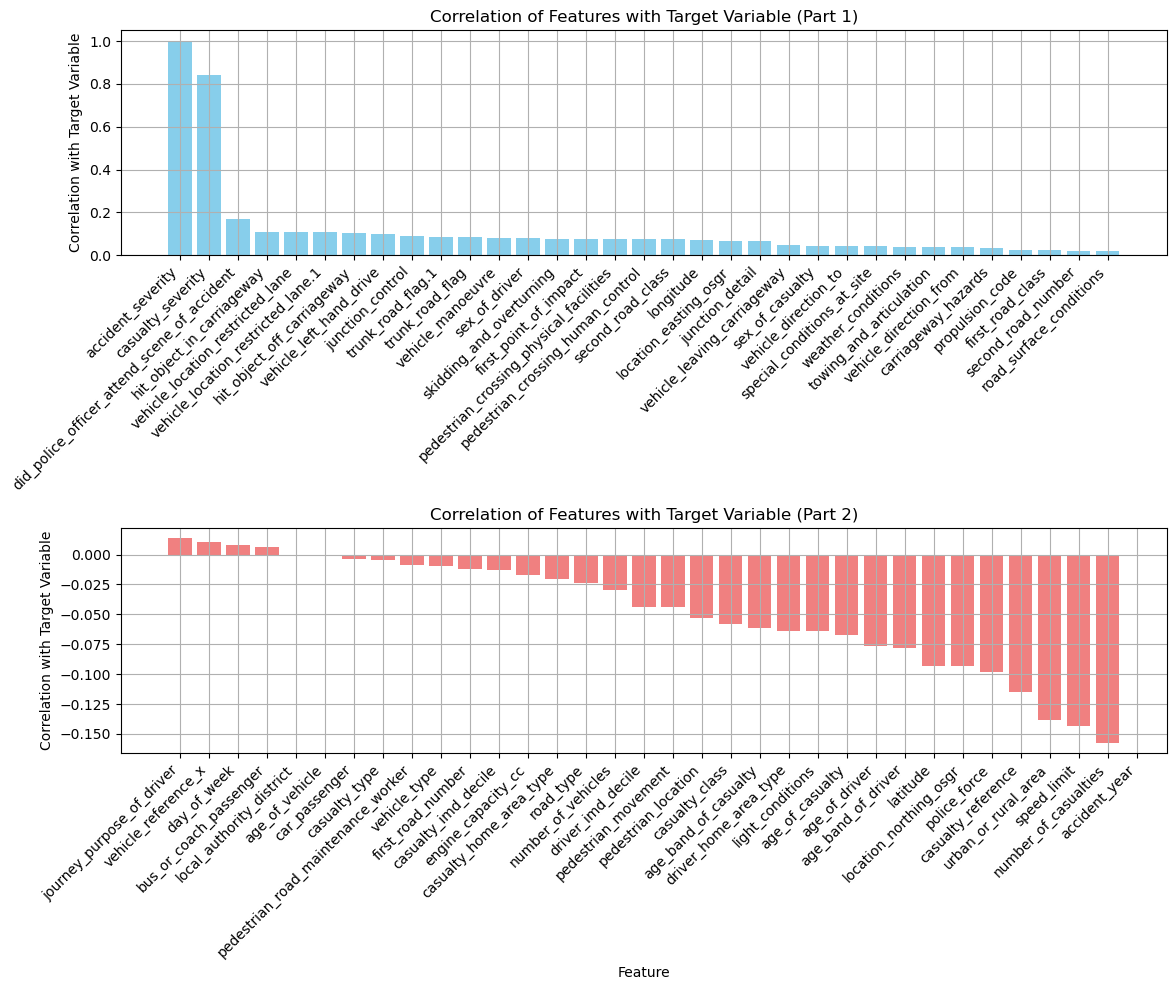

In [13]:
# Calculate the correlation matrix
corr_matrix = merged_data.corr()

# Calculate the correlation between features and the target variable
corr_with_target = merged_data.corr()['accident_severity'].sort_values(ascending=False)

# Print the correlation values with the target variable one by one
for feature, correlation in corr_with_target.items():
    print(f"{feature}: {correlation}")
    
# Determine the number of features to split into two plots
num_features = len(corr_with_target)
split_point = num_features // 2

# Create two subplots to visualize the correlations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the first half of the features
bars1 = ax1.bar(corr_with_target.index[:split_point], corr_with_target.values[:split_point], color='skyblue')
ax1.set_ylabel('Correlation with Target Variable')
ax1.set_title('Correlation of Features with Target Variable (Part 1)')
ax1.grid(True)

# Plot the second half of the features
bars2 = ax2.bar(corr_with_target.index[split_point:], corr_with_target.values[split_point:], color='lightcoral')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Correlation with Target Variable')
ax2.set_title('Correlation of Features with Target Variable (Part 2)')
ax2.grid(True)

# Manually set the x-axis ticks and labels at the bottom of the bars
ax1.set_xticks(range(len(corr_with_target.index[:split_point])))
ax1.set_xticklabels(corr_with_target.index[:split_point], rotation=45, ha='right')
ax2.set_xticks(range(len(corr_with_target.index[split_point:])))
ax2.set_xticklabels(corr_with_target.index[split_point:], rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()



Here we can see the correlation values between the features and the target variable "accident_severity." Based on these correlation values, we can see how each feature is related to the severity of accidents. Here are some key takeaways:

Positive Correlations (values closer to 1):
- Features like "casualty_severity," "did_police_officer_attend_scene_of_accident," and "hit_object_in_carriageway" have positive correlations with accident severity. This means that as these features increase, the accident severity tends to increase as well.

Negative Correlations (values closer to -1):
- Features like "speed_limit," "number_of_casualties," "urban_or_rural_area," and others have negative correlations with accident severity. This implies that lower speed limits, fewer casualties, and accidents in urban areas are associated with less severe accidents.

Correlations close to zero indicate weaker relationships between the features and accident severity.

It's essential to interpret these correlations in the context of our analysis goals. Features with strong positive or negative correlations can be considered important factors affecting accident severity and may be valuable for building predictive models or further analysis.

These relationships are based on statistical associations, and further analysis or domain knowledge may be needed to understand the underlying causes of these correlations.

Additionally, we've noted that the "accident_year" feature has a correlation value of "NaN." This might be due to limited variation in the "accident_year" feature, making it uninformative for predicting accident severity. We may consider excluding it from our analysis if it does not provide meaningful information.

In addition to these steps, we remove columns that have little contribution to understanding accident severity.

In [14]:
# List of columns to keep
columns_to_keep = [
    'accident_reference',
    'location_easting_osgr',
    'location_northing_osgr',
    'longitude',
    'latitude',
    'police_force',
    'accident_severity',
    'number_of_vehicles',
    'date',
    'day_of_week',
    'time',
    'local_authority_district',
    'first_road_class',
    'first_road_number',
    'road_type',
    'speed_limit',
    'junction_detail',
    'junction_control',
    'second_road_class',
    'second_road_number',
    'pedestrian_crossing_human_control',
    'pedestrian_crossing_physical_facilities',
    'light_conditions',
    'weather_conditions',
    'road_surface_conditions',
    'special_conditions_at_site',
    'carriageway_hazards',
    'did_police_officer_attend_scene_of_accident',
    'trunk_road_flag',
    'trunk_road_flag.1',
    'vehicle_reference_x',
    'casualty_class',
    'sex_of_casualty',
    'age_of_casualty',
    'age_band_of_casualty',
    'casualty_severity',
    'pedestrian_location',
    'pedestrian_movement',
    'car_passenger',
    'bus_or_coach_passenger',
    'pedestrian_road_maintenance_worker',
    'casualty_type',
    'casualty_home_area_type',
    'casualty_imd_decile',
    'vehicle_type',
    'towing_and_articulation',
    'vehicle_manoeuvre',
    'vehicle_direction_from',
    'vehicle_direction_to',
    'vehicle_location_restricted_lane',
    'vehicle_location_restricted_lane.1',
    'skidding_and_overturning',
    'hit_object_in_carriageway',
    'vehicle_leaving_carriageway',
    'hit_object_off_carriageway',
    'first_point_of_impact',
    'vehicle_left_hand_drive',
    'journey_purpose_of_driver',
    'sex_of_driver',
    'age_of_driver',
    'age_band_of_driver',
    'engine_capacity_cc',
    'propulsion_code',
    'age_of_vehicle',
    'driver_imd_decile',
    'driver_home_area_type',
    'lsoa_of_driver'
]

# Keep only the specified columns
merged_data = merged_data[columns_to_keep]

# Remove rows with null values
merged_data = merged_data.dropna()

In [15]:
merged_data.shape

(246271, 67)

# Decesion Tree Algorithm

In this first expriment selected features from the statestical summary and the corelation values which could be appropriate to predict the severity level of the accident.

In [16]:
# Select the features and target variable
features = ["did_police_officer_attend_scene_of_accident", "casualty_severity", "speed_limit", "junction_detail", "casualty_class", "day_of_week", "hit_object_in_carriageway", "vehicle_location_restricted_lane"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Define class names
class_names = ["Fatal", "Serious", "Slight"]


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.96      0.64      0.77       947
     Serious       0.97      0.78      0.86     10585
      Slight       0.94      1.00      0.97     37723

    accuracy                           0.94     49255
   macro avg       0.96      0.81      0.87     49255
weighted avg       0.95      0.94      0.94     49255



### Random Forest Algorithm

In [17]:
# Select the features and target variable

features = ["did_police_officer_attend_scene_of_accident","casualty_severity","speed_limit","junction_detail","casualty_class","day_of_week","hit_object_in_carriageway","vehicle_location_restricted_lane"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.98      0.63      0.77       947
     Serious       0.98      0.78      0.87     10585
      Slight       0.94      1.00      0.97     37723

    accuracy                           0.94     49255
   macro avg       0.97      0.80      0.87     49255
weighted avg       0.95      0.94      0.94     49255



# DT Classifier with the variables before the accident (features)

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.63      0.77       947
     Serious       0.98      0.77      0.87     10585
      Slight       0.94      1.00      0.97     37723

    accuracy                           0.94     49255
   macro avg       0.97      0.80      0.87     49255
weighted avg       0.95      0.94      0.94     49255



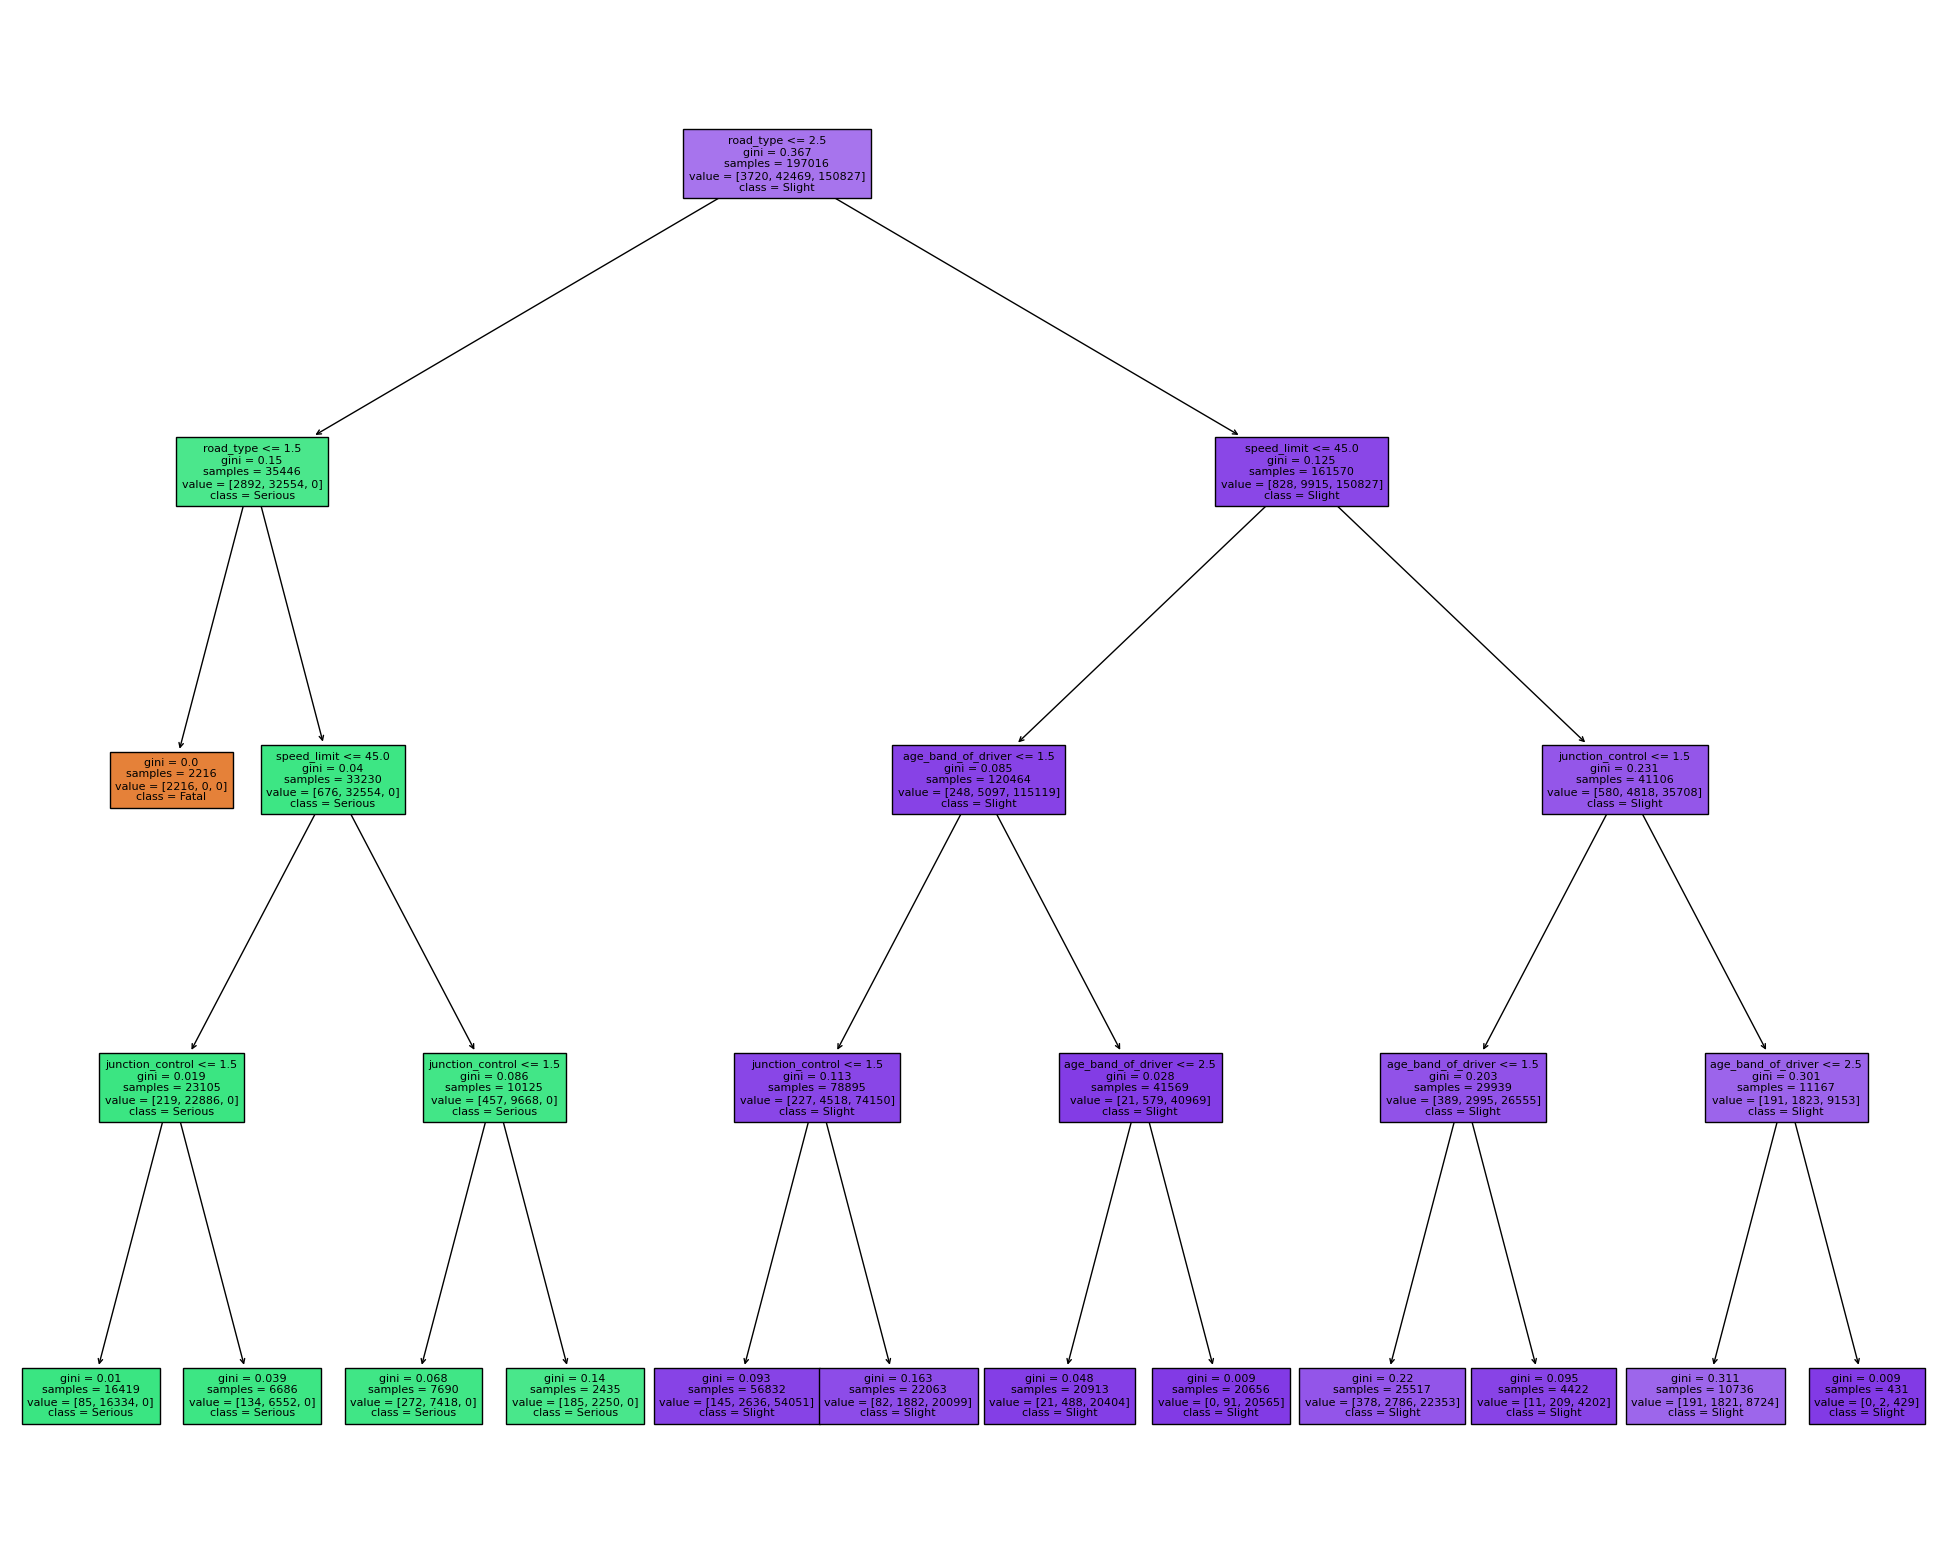

In [18]:
# Select the features and target variable
features = ["age_band_of_driver","road_type","speed_limit","junction_detail","junction_control","light_conditions","special_conditions_at_site","carriageway_hazards","vehicle_type","vehicle_manoeuvre","vehicle_direction_from","vehicle_direction_to","junction_detail","hit_object_in_carriageway","propulsion_code"]
target = "accident_severity"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report with zero_division parameter
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names, zero_division=1)
print("Classification Report:")
print(report)

# Visualize the Decision Tree with readable labels
plt.figure(figsize=(25, 20))
plot_tree(model, filled=True, feature_names=features, class_names=class_names, fontsize=8)
plt.show()


# Random Forest Algorithm with the variables before the accident(features)

In [19]:
# Select the features and target variable

features = ["age_band_of_driver","road_type","speed_limit","junction_detail","junction_control","light_conditions","special_conditions_at_site","carriageway_hazards","vehicle_type","vehicle_manoeuvre","vehicle_direction_from","vehicle_direction_to","junction_detail","hit_object_in_carriageway","propulsion_code"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.68      0.40      0.50       947
     Serious       0.63      0.40      0.49     10585
      Slight       0.84      0.94      0.89     37723

    accuracy                           0.81     49255
   macro avg       0.72      0.58      0.63     49255
weighted avg       0.79      0.81      0.79     49255



# Gradient Boosting Algorithm variables before accident

In [20]:
# Select the features and target variable
features = ["age_band_of_driver", "road_type", "speed_limit", "junction_detail", "junction_control", "light_conditions", "special_conditions_at_site", "carriageway_hazards", "vehicle_type", "vehicle_manoeuvre", "vehicle_direction_from", "vehicle_direction_to", "junction_detail", "hit_object_in_carriageway", "propulsion_code"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
model = GradientBoostingClassifier(random_state=42) 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("a Report:")
print(report)

Accuracy: 0.77
a Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.00      0.00       947
     Serious       0.57      0.04      0.07     10585
      Slight       0.77      0.99      0.87     37723

    accuracy                           0.77     49255
   macro avg       0.78      0.34      0.31     49255
weighted avg       0.73      0.77      0.68     49255



# XG Boost Algorithm with the variables before accident

In [21]:
# Select the features and target variable
features = ["age_band_of_driver", "road_type", "speed_limit","junction_control", "light_conditions", "special_conditions_at_site", "carriageway_hazards", "vehicle_type", "vehicle_manoeuvre", "vehicle_direction_from", "vehicle_direction_to", "junction_detail", "hit_object_in_carriageway", "propulsion_code"]
target = "accident_severity"

# Map target variable to expected values
target_mapping = {1: 0, 2: 1, 3: 2}
merged_data["accident_severity"] = merged_data["accident_severity"].map(target_mapping)

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]

# Remove rows with NaN values in the target variable
nan_indices = np.isnan(y)
X = X[~nan_indices]
y = y[~nan_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier(random_state=42)  # Use XGBoost classifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

       Fatal       0.83      0.03      0.06       947
     Serious       0.61      0.07      0.12     10585
      Slight       0.78      0.99      0.87     37723

    accuracy                           0.77     49255
   macro avg       0.74      0.36      0.35     49255
weighted avg       0.74      0.77      0.69     49255



# DT algorithm with the variables (After accident)

Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.63      0.77       947
     Serious       0.98      0.77      0.87     10585
      Slight       0.94      1.00      0.97     37723

    accuracy                           0.94     49255
   macro avg       0.97      0.80      0.87     49255
weighted avg       0.95      0.94      0.94     49255



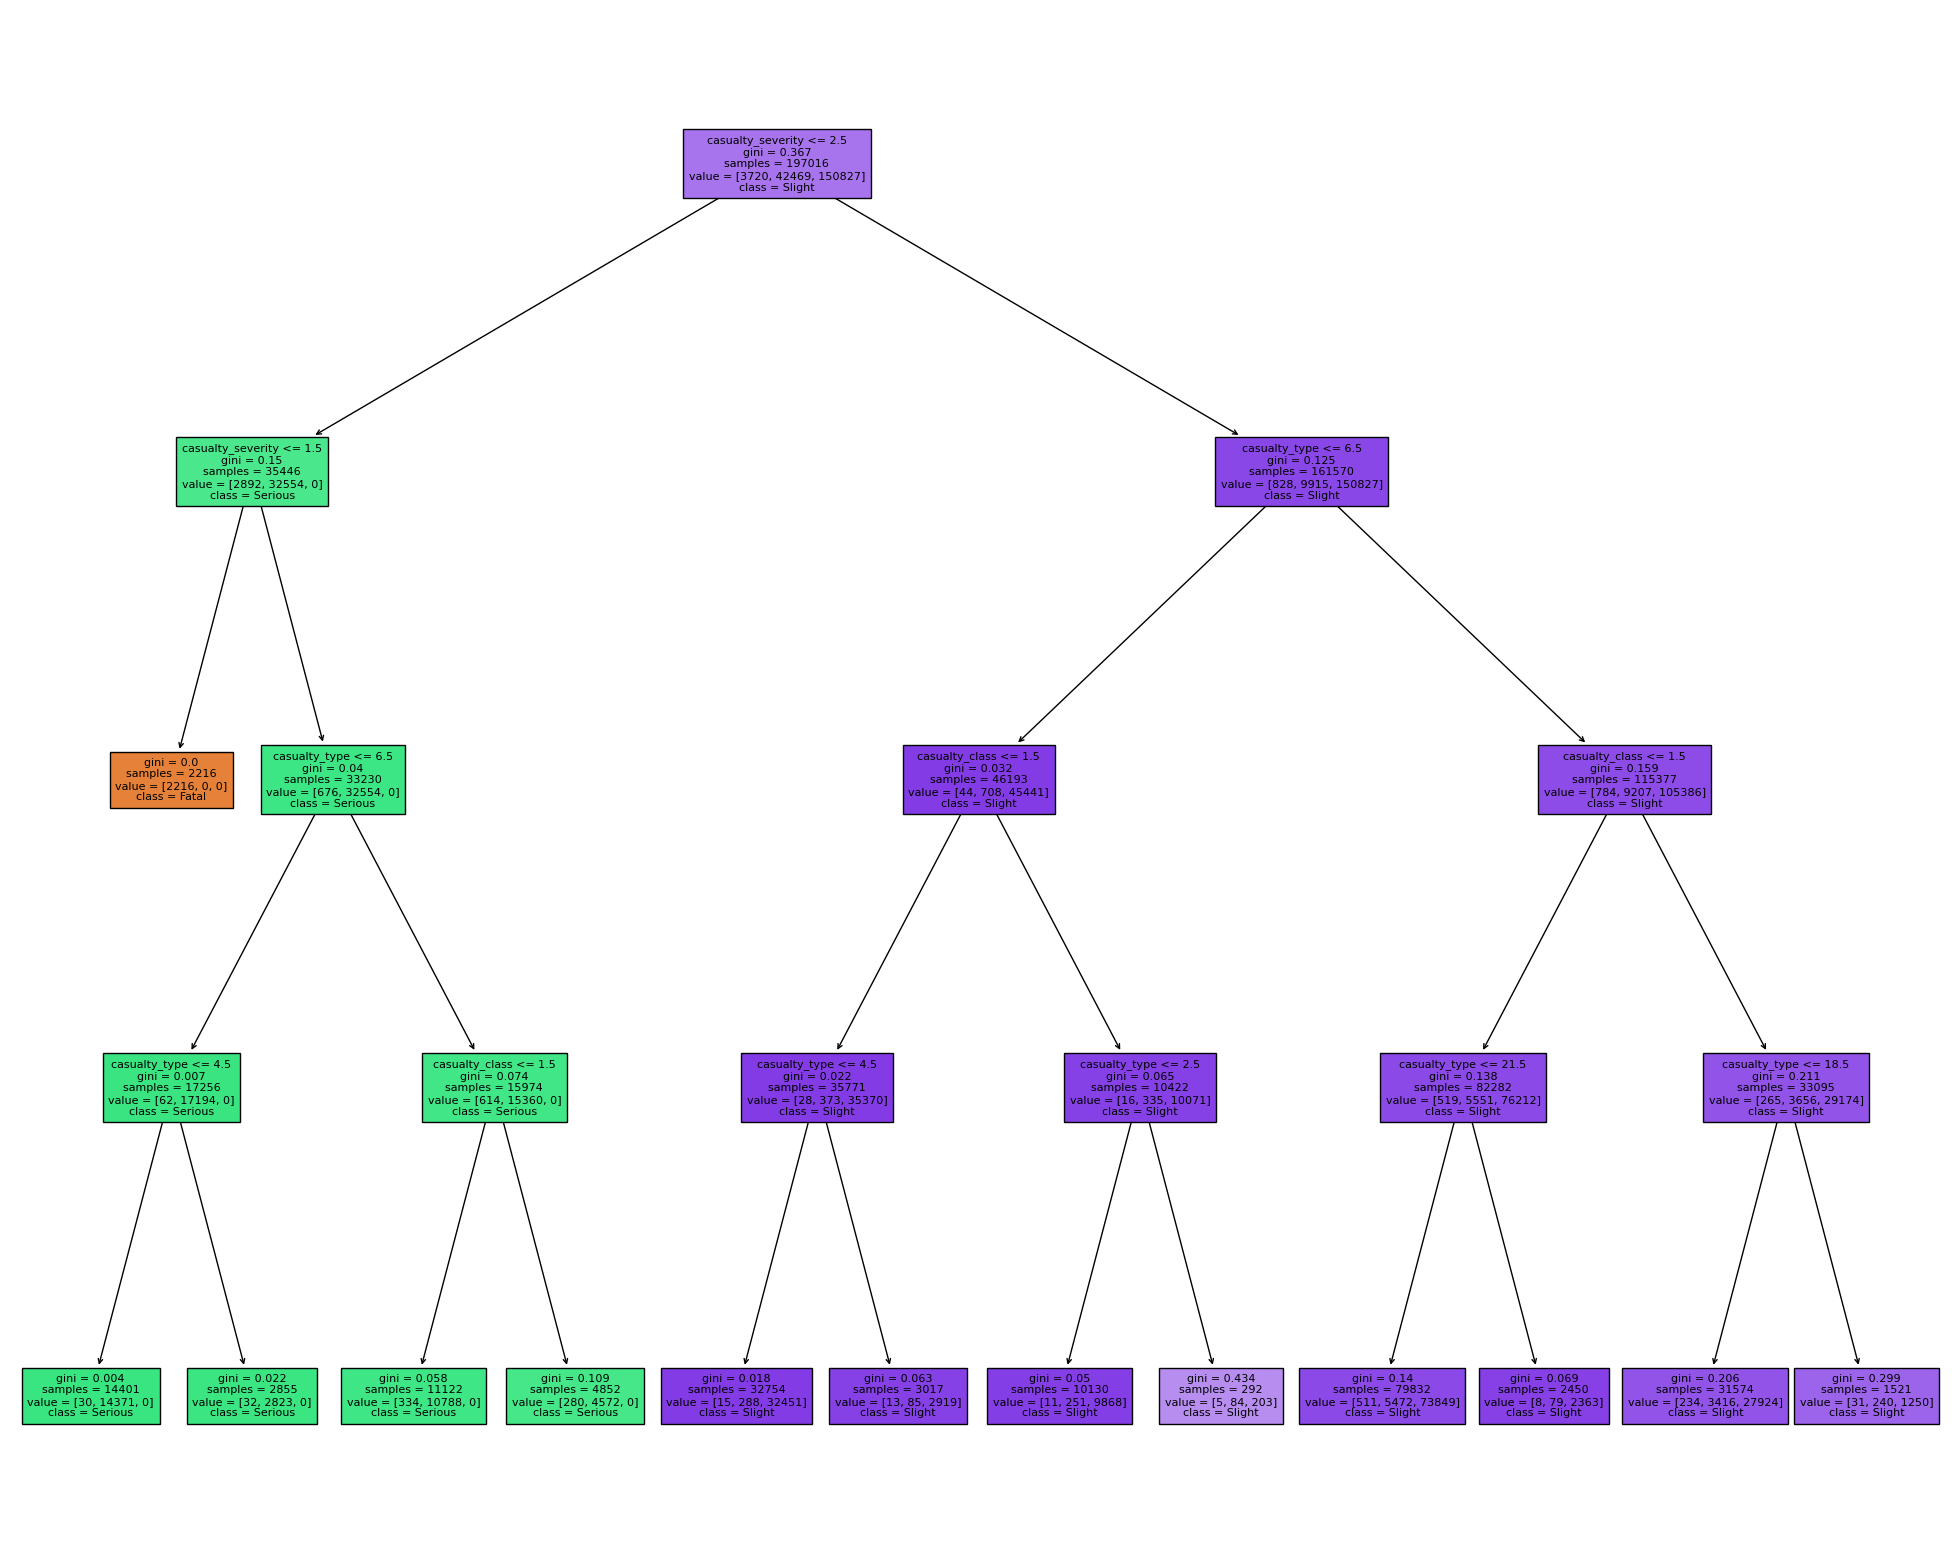

In [22]:
# Select the features and target variable
features = ["casualty_class","casualty_severity", "pedestrian_movement", "casualty_type"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42,max_depth=4)  # Use DecisionTreeClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report) 

# Visualize the Decision Tree with readable labels
plt.figure(figsize=(25, 20))
plot_tree(model, filled=True, feature_names=features, class_names=class_names, fontsize=8)
plt.show()


# Random Forest Algorithm with variables after the accident

In [23]:
# Select the features and target variable
features = ["casualty_class", "casualty_severity", "pedestrian_movement", "casualty_type"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestClassifier
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.63      0.77       947
     Serious       0.98      0.77      0.87     10585
      Slight       0.94      1.00      0.97     37723

    accuracy                           0.94     49255
   macro avg       0.97      0.80      0.87     49255
weighted avg       0.95      0.94      0.94     49255



# Gradient Boosting Algorithm with the variables after the accident

In [24]:
# Select the features and target variable
features = ["casualty_class","casualty_severity", "pedestrian_movement", "casualty_type"]
target = "accident_severity"

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
model = GradientBoostingClassifier(random_state=42) 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate the classification report
class_names = ["Fatal", "Serious", "Slight"]
report = classification_report(y_test, y_pred, target_names=class_names)
print("a Report:")
print(report)

Accuracy: 0.94
a Report:
              precision    recall  f1-score   support

       Fatal       1.00      0.63      0.77       947
     Serious       0.98      0.77      0.87     10585
      Slight       0.94      1.00      0.97     37723

    accuracy                           0.94     49255
   macro avg       0.97      0.80      0.87     49255
weighted avg       0.95      0.94      0.94     49255

